In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
# PART 1: Data Generation (Simulating RetailChain's Data Sources)
class RetailChainDataGenerator:
    """
    Simulates various data sources for RetailChain:
    - Sales transactions
    - Customer loyalty data
    - Product information
    - Store locations
    - Online platform activity
    """
    
    def __init__(self, num_customers=1000, num_products=100, num_stores=50, num_transactions=5000):
        self.num_customers = num_customers
        self.num_products = num_products
        self.num_stores = num_stores
        self.num_transactions = num_transactions
        self.current_date = datetime.now()
        
    def generate_customer_data(self):
        """Generate customer loyalty program data"""
        customer_types = ['Regular', 'Premium', 'VIP']
        age_groups = ['18-25', '26-35', '36-50', '51-65', '65+']
        regions = ['North', 'South', 'East', 'West', 'Central']
        
        customers = []
        for i in range(1, self.num_customers + 1):
            customer = {
                'customer_id': f'CUST_{i:05d}',
                'age_group': random.choice(age_groups),
                'customer_type': random.choice(customer_types),
                'region': random.choice(regions),
                'loyalty_points': random.randint(0, 5000),
                'join_date': self.current_date - timedelta(days=random.randint(1, 1095)),
                'email_opted': random.choice([True, False]),
                'sms_opted': random.choice([True, False])
            }
            customers.append(customer)
        return pd.DataFrame(customers)
    
    def generate_product_data(self):
        """Generate product catalog data"""
        categories = ['Electronics', 'Clothing', 'Home & Garden', 'Sports', 'Books', 'Food', 'Beauty']
        subcategories = {
            'Electronics': ['Laptops', 'Smartphones', 'Accessories', 'TVs', 'Audio'],
            'Clothing': ['Men', 'Women', 'Kids', 'Footwear', 'Accessories'],
            'Home & Garden': ['Furniture', 'Decor', 'Kitchen', 'Garden', 'Tools'],
            'Sports': ['Fitness', 'Outdoor', 'Team Sports', 'Water Sports', 'Cycling'],
            'Books': ['Fiction', 'Non-fiction', 'Educational', 'Children', 'Magazines'],
            'Food': ['Groceries', 'Snacks', 'Beverages', 'Organic', 'International'],
            'Beauty': ['Skincare', 'Makeup', 'Haircare', 'Fragrance', 'Personal Care']
        }
        
        products = []
        for i in range(1, self.num_products + 1):
            category = random.choice(categories)
            product = {
                'product_id': f'PROD_{i:04d}',
                'product_name': f'Product_{i}',
                'category': category,
                'subcategory': random.choice(subcategories[category]),
                'unit_price': round(random.uniform(5, 500), 2),
                'cost_price': round(random.uniform(3, 400), 2),
                'supplier': f'SUPP_{random.randint(1, 20):02d}',
                'stock_level': random.randint(0, 1000)
            }
            products.append(product)
        return pd.DataFrame(products)
    
    def generate_store_data(self):
        """Generate store location data"""
        store_types = ['Mall', 'High Street', 'Retail Park', 'Online Only']
        
        stores = []
        for i in range(1, self.num_stores + 1):
            store = {
                'store_id': f'STORE_{i:03d}',
                'store_type': random.choice(store_types),
                'region': random.choice(['North', 'South', 'East', 'West', 'Central']),
                'size_sqft': random.randint(1000, 50000),
                'opening_date': self.current_date - timedelta(days=random.randint(1, 1825)),
                'online_capacity': random.choice([True, False])
            }
            stores.append(store)
        return pd.DataFrame(stores)
    
    def generate_transaction_data(self, customers_df, products_df, stores_df):
        """Generate sales transaction data"""
        transactions = []
        payment_methods = ['Credit Card', 'Debit Card', 'Cash', 'Gift Card', 'Mobile Payment']
        channels = ['In-Store', 'Online', 'Mobile App']
        
        for i in range(1, self.num_transactions + 1):
            # Random date within last 6 months
            transaction_date = self.current_date - timedelta(days=random.randint(1, 180))
            
            transaction = {
                'transaction_id': f'TRX_{i:06d}',
                'customer_id': random.choice(customers_df['customer_id']),
                'store_id': random.choice(stores_df['store_id']),
                'product_id': random.choice(products_df['product_id']),
                'transaction_date': transaction_date,
                'quantity': random.randint(1, 5),
                'payment_method': random.choice(payment_methods),
                'channel': random.choice(channels),
                'discount_applied': random.choice([0, 0, 0, 0.1, 0.15, 0.2])  # More zeros for no discount
            }
            transactions.append(transaction)
        
        transactions_df = pd.DataFrame(transactions)
        
        # Merge with product prices
        transactions_df = transactions_df.merge(
            products_df[['product_id', 'unit_price', 'cost_price', 'category']], 
            on='product_id', 
            how='left'
        )
        
        # Calculate actual price after discount
        transactions_df['actual_price'] = transactions_df['unit_price'] * (1 - transactions_df['discount_applied'])
        transactions_df['revenue'] = transactions_df['actual_price'] * transactions_df['quantity']
        transactions_df['profit'] = (transactions_df['actual_price'] - transactions_df['cost_price']) * transactions_df['quantity']
        
        return transactions_df

# Generate the data
print("=" * 80)
print("RETAILCHAIN BIG DATA ANALYTICS DEMONSTRATION")
print("=" * 80)

generator = RetailChainDataGenerator(
    num_customers=1000,
    num_products=100,
    num_stores=50,
    num_transactions=10000
)

print("\n[1] GENERATING SYNTHETIC RETAIL DATA...")
customers_df = generator.generate_customer_data()
products_df = generator.generate_product_data()
stores_df = generator.generate_store_data()
transactions_df = generator.generate_transaction_data(customers_df, products_df, stores_df)

print(f"\nData Generated Successfully:")
print(f"- Customers: {len(customers_df):,}")
print(f"- Products: {len(products_df):,}")
print(f"- Stores: {len(stores_df):,}")
print(f"- Transactions: {len(transactions_df):,}")

RETAILCHAIN BIG DATA ANALYTICS DEMONSTRATION

[1] GENERATING SYNTHETIC RETAIL DATA...

Data Generated Successfully:
- Customers: 1,000
- Products: 100
- Stores: 50
- Transactions: 10,000


In [4]:
# PART 2: Data Processing and Analytics Workflow

class RetailAnalyticsProcessor:
    """
    Processes retail data to generate business insights
    Demonstrates batch processing approach for big data analytics
    """
    
    def __init__(self, transactions_df, customers_df, products_df, stores_df):
        self.transactions = transactions_df
        self.customers = customers_df
        self.products = products_df
        self.stores = stores_df
        
    def perform_sales_analysis(self):
        """Analyze sales trends and patterns"""
        print("\n" + "=" * 80)
        print("[2] PERFORMING SALES ANALYSIS")
        print("=" * 80)
        
        # Overall sales metrics
        total_revenue = self.transactions['revenue'].sum()
        total_profit = self.transactions['profit'].sum()
        avg_transaction_value = self.transactions.groupby('transaction_id')['revenue'].sum().mean()
        
        print(f"\nOverall Sales Metrics:")
        print(f"- Total Revenue: £{total_revenue:,.2f}")
        print(f"- Total Profit: £{total_profit:,.2f}")
        print(f"- Average Transaction Value: £{avg_transaction_value:,.2f}")
        
        # Category performance
        category_performance = self.transactions.groupby('category').agg({
            'revenue': 'sum',
            'profit': 'sum',
            'quantity': 'sum',
            'transaction_id': 'count'
        }).round(2)
        category_performance.columns = ['Revenue', 'Profit', 'Units Sold', 'Transaction Count']
        category_performance['Profit Margin %'] = (category_performance['Profit'] / category_performance['Revenue'] * 100).round(2)
        category_performance = category_performance.sort_values('Revenue', ascending=False)
        
        print("\nCategory Performance:")
        print(category_performance.to_string())
        
        return category_performance
    
    def perform_customer_analysis(self):
        """Analyze customer behavior and segmentation"""
        print("\n" + "=" * 80)
        print("[3] PERFORMING CUSTOMER ANALYSIS")
        print("=" * 80)
        
        # Customer lifetime value metrics
        customer_metrics = self.transactions.groupby('customer_id').agg({
            'revenue': ['sum', 'count', 'mean'],
            'profit': 'sum'
        }).round(2)
        customer_metrics.columns = ['Total_Spend', 'Transaction_Count', 'Avg_Transaction', 'Total_Profit']
        
        # Merge with customer demographics
        customer_analysis = customer_metrics.merge(
            self.customers[['customer_id', 'age_group', 'region', 'customer_type']], 
            left_index=True, 
            right_on='customer_id'
        )
        
        # Customer segmentation (RFM - Recency, Frequency, Monetary)
        latest_date = self.transactions['transaction_date'].max()
        rfm = self.transactions.groupby('customer_id').agg({
            'transaction_date': lambda x: (latest_date - x.max()).days,  # Recency
            'transaction_id': 'count',  # Frequency
            'revenue': 'sum'  # Monetary
        }).round(2)
        rfm.columns = ['Recency', 'Frequency', 'Monetary']
        
        # Segment customers
        rfm['Segment'] = pd.cut(rfm['Monetary'], 
                                bins=[0, 100, 500, 2000, float('inf')],
                                labels=['Bronze', 'Silver', 'Gold', 'Platinum'])
        
        print(f"\nCustomer Segmentation Summary:")
        print(rfm['Segment'].value_counts())
        
        # Regional analysis
        regional_analysis = customer_analysis.groupby('region').agg({
            'Total_Spend': 'sum',
            'Transaction_Count': 'sum',
            'customer_id': 'nunique'
        }).round(2)
        regional_analysis.columns = ['Total_Revenue', 'Total_Transactions', 'Unique_Customers']
        
        print("\nRegional Performance:")
        print(regional_analysis.to_string())
        
        return rfm, customer_analysis, regional_analysis
    
    def perform_time_series_analysis(self):
        """Analyze temporal patterns in sales"""
        print("\n" + "=" * 80)
        print("[4] PERFORMING TIME SERIES ANALYSIS")
        print("=" * 80)
        
        # Daily sales trends
        daily_sales = self.transactions.groupby(
            pd.Grouper(key='transaction_date', freq='D')
        )['revenue'].sum().reset_index()
        daily_sales.columns = ['Date', 'Daily_Revenue']
        
        # Weekly patterns
        self.transactions['day_of_week'] = pd.to_datetime(self.transactions['transaction_date']).dt.day_name()
        daily_pattern = self.transactions.groupby('day_of_week')['revenue'].mean().sort_values(ascending=False)
        
        print("\nAverage Daily Sales by Day of Week:")
        for day, revenue in daily_pattern.items():
            print(f"- {day}: £{revenue:,.2f}")
        
        # Monthly trends
        monthly_sales = self.transactions.groupby(
            pd.Grouper(key='transaction_date', freq='M')
        )['revenue'].sum().reset_index()
        monthly_sales.columns = ['Month', 'Monthly_Revenue']
        
        print(f"\nMonthly Sales Trend:")
        for _, row in monthly_sales.iterrows():
            print(f"- {row['Month'].strftime('%B %Y')}: £{row['Monthly_Revenue']:,.2f}")
        
        return daily_sales, daily_pattern, monthly_sales
    
    def perform_inventory_analysis(self):
        """Analyze inventory performance and optimization opportunities"""
        print("\n" + "=" * 80)
        print("[5] PERFORMING INVENTORY ANALYSIS")
        print("=" * 80)
        
        # Product performance
        product_performance = self.transactions.groupby('product_id').agg({
            'quantity': 'sum',
            'revenue': 'sum',
            'profit': 'sum'
        }).round(2)
        
        # Merge with product details
        product_analysis = product_performance.merge(
            self.products[['product_id', 'product_name', 'category', 'stock_level', 'unit_price']],
            on='product_id'
        )
        
        # Calculate sell-through rate and days of inventory
        product_analysis['sell_through_rate'] = (
            product_analysis['quantity'] / (product_analysis['stock_level'] + product_analysis['quantity'])
        ).round(3)
        
        product_analysis['inventory_value'] = product_analysis['stock_level'] * product_analysis['unit_price']
        
        print(f"\nInventory Metrics:")
        print(f"- Total Inventory Value: £{product_analysis['inventory_value'].sum():,.2f}")
        print(f"- Average Sell-through Rate: {product_analysis['sell_through_rate'].mean():.1%}")
        
        # Identify slow-moving products
        slow_moving = product_analysis[product_analysis['sell_through_rate'] < 0.1].sort_values('inventory_value', ascending=False)
        
        print(f"\nSlow-moving Products (Sell-through < 10%): {len(slow_moving)} products")
        print(f"- Total Value of Slow-moving Stock: £{slow_moving['inventory_value'].sum():,.2f}")
        
        return product_analysis, slow_moving

# Initialize processor
processor = RetailAnalyticsProcessor(transactions_df, customers_df, products_df, stores_df)

# Perform analyses
category_performance = processor.perform_sales_analysis()
rfm, customer_analysis, regional_analysis = processor.perform_customer_analysis()
daily_sales, daily_pattern, monthly_sales = processor.perform_time_series_analysis()
product_analysis, slow_moving = processor.perform_inventory_analysis()


[2] PERFORMING SALES ANALYSIS

Overall Sales Metrics:
- Total Revenue: £6,384,078.60
- Total Profit: £420,502.75
- Average Transaction Value: £638.41

Category Performance:
                  Revenue     Profit  Units Sold  Transaction Count  Profit Margin %
category                                                                            
Electronics    1573651.89  233292.24        6834               2302            14.82
Food           1265987.99  477515.32        5012               1710            37.72
Sports         1015511.52  224194.12        4455               1513            22.08
Clothing        783598.90  276564.91        3046               1027            35.29
Books           717985.37 -336938.66        4745               1583           -46.93
Beauty          584175.63 -354766.70        3138               1039           -60.73
Home & Garden   443167.30  -99358.48        2479                826           -22.42

[3] PERFORMING CUSTOMER ANALYSIS

Customer Segmentation Summ

In [5]:
# PART 3: Predictive Analytics (Machine Learning)

print("\n" + "=" * 80)
print("[6] PREDICTIVE ANALYTICS - SALES FORECASTING")
print("=" * 80)

class SalesForecastingModel:
    """
    Implements a machine learning model to predict future sales
    Demonstrates advanced analytics capabilities
    """
    
    def __init__(self, transactions_df, products_df):
        self.transactions = transactions_df
        self.products = products_df
        self.model = None
        
    def prepare_features(self):
        """Prepare features for sales prediction"""
        # Aggregate daily sales by category
        daily_category_sales = self.transactions.groupby([
            pd.Grouper(key='transaction_date', freq='D'),
            'category'
        ])['revenue'].sum().reset_index()
        
        # Create time-based features
        daily_category_sales['day_of_week'] = pd.to_datetime(daily_category_sales['transaction_date']).dt.dayofweek
        daily_category_sales['month'] = pd.to_datetime(daily_category_sales['transaction_date']).dt.month
        daily_category_sales['quarter'] = pd.to_datetime(daily_category_sales['transaction_date']).dt.quarter
        daily_category_sales['is_weekend'] = daily_category_sales['day_of_week'].isin([5, 6]).astype(int)
        
        # Create lag features
        for lag in [1, 7, 30]:  # Previous day, week, month
            daily_category_sales[f'lag_{lag}_days'] = daily_category_sales.groupby('category')['revenue'].shift(lag)
        
        # Drop rows with NaN values
        daily_category_sales = daily_category_sales.dropna()
        
        return daily_category_sales
    
    def train_model(self, category_name):
        """Train a Random Forest model for a specific category"""
        data = self.prepare_features()
        category_data = data[data['category'] == category_name].copy()
        
        # Define features and target
        feature_columns = ['day_of_week', 'month', 'quarter', 'is_weekend', 'lag_1_days', 'lag_7_days', 'lag_30_days']
        X = category_data[feature_columns]
        y = category_data['revenue']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train model
        self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        self.model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = self.model.predict(X_test)
        
        # Evaluate model
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"\nCategory: {category_name}")
        print(f"Model Performance:")
        print(f"- Mean Absolute Error: £{mae:,.2f}")
        print(f"- R² Score: {r2:.3f}")
        print(f"- Feature Importance:")
        
        for feature, importance in zip(feature_columns, self.model.feature_importances_):
            print(f"  * {feature}: {importance:.3f}")
        
        return self.model, mae, r2

# Train forecasting model for Electronics category
forecaster = SalesForecastingModel(transactions_df, products_df)
electronics_model, mae, r2 = forecaster.train_model('Electronics')


[6] PREDICTIVE ANALYTICS - SALES FORECASTING

Category: Electronics
Model Performance:
- Mean Absolute Error: £3,113.02
- R² Score: -0.254
- Feature Importance:
  * day_of_week: 0.110
  * month: 0.097
  * quarter: 0.035
  * is_weekend: 0.014
  * lag_1_days: 0.228
  * lag_7_days: 0.299
  * lag_30_days: 0.217



[7] GENERATING BUSINESS INTELLIGENCE DASHBOARD


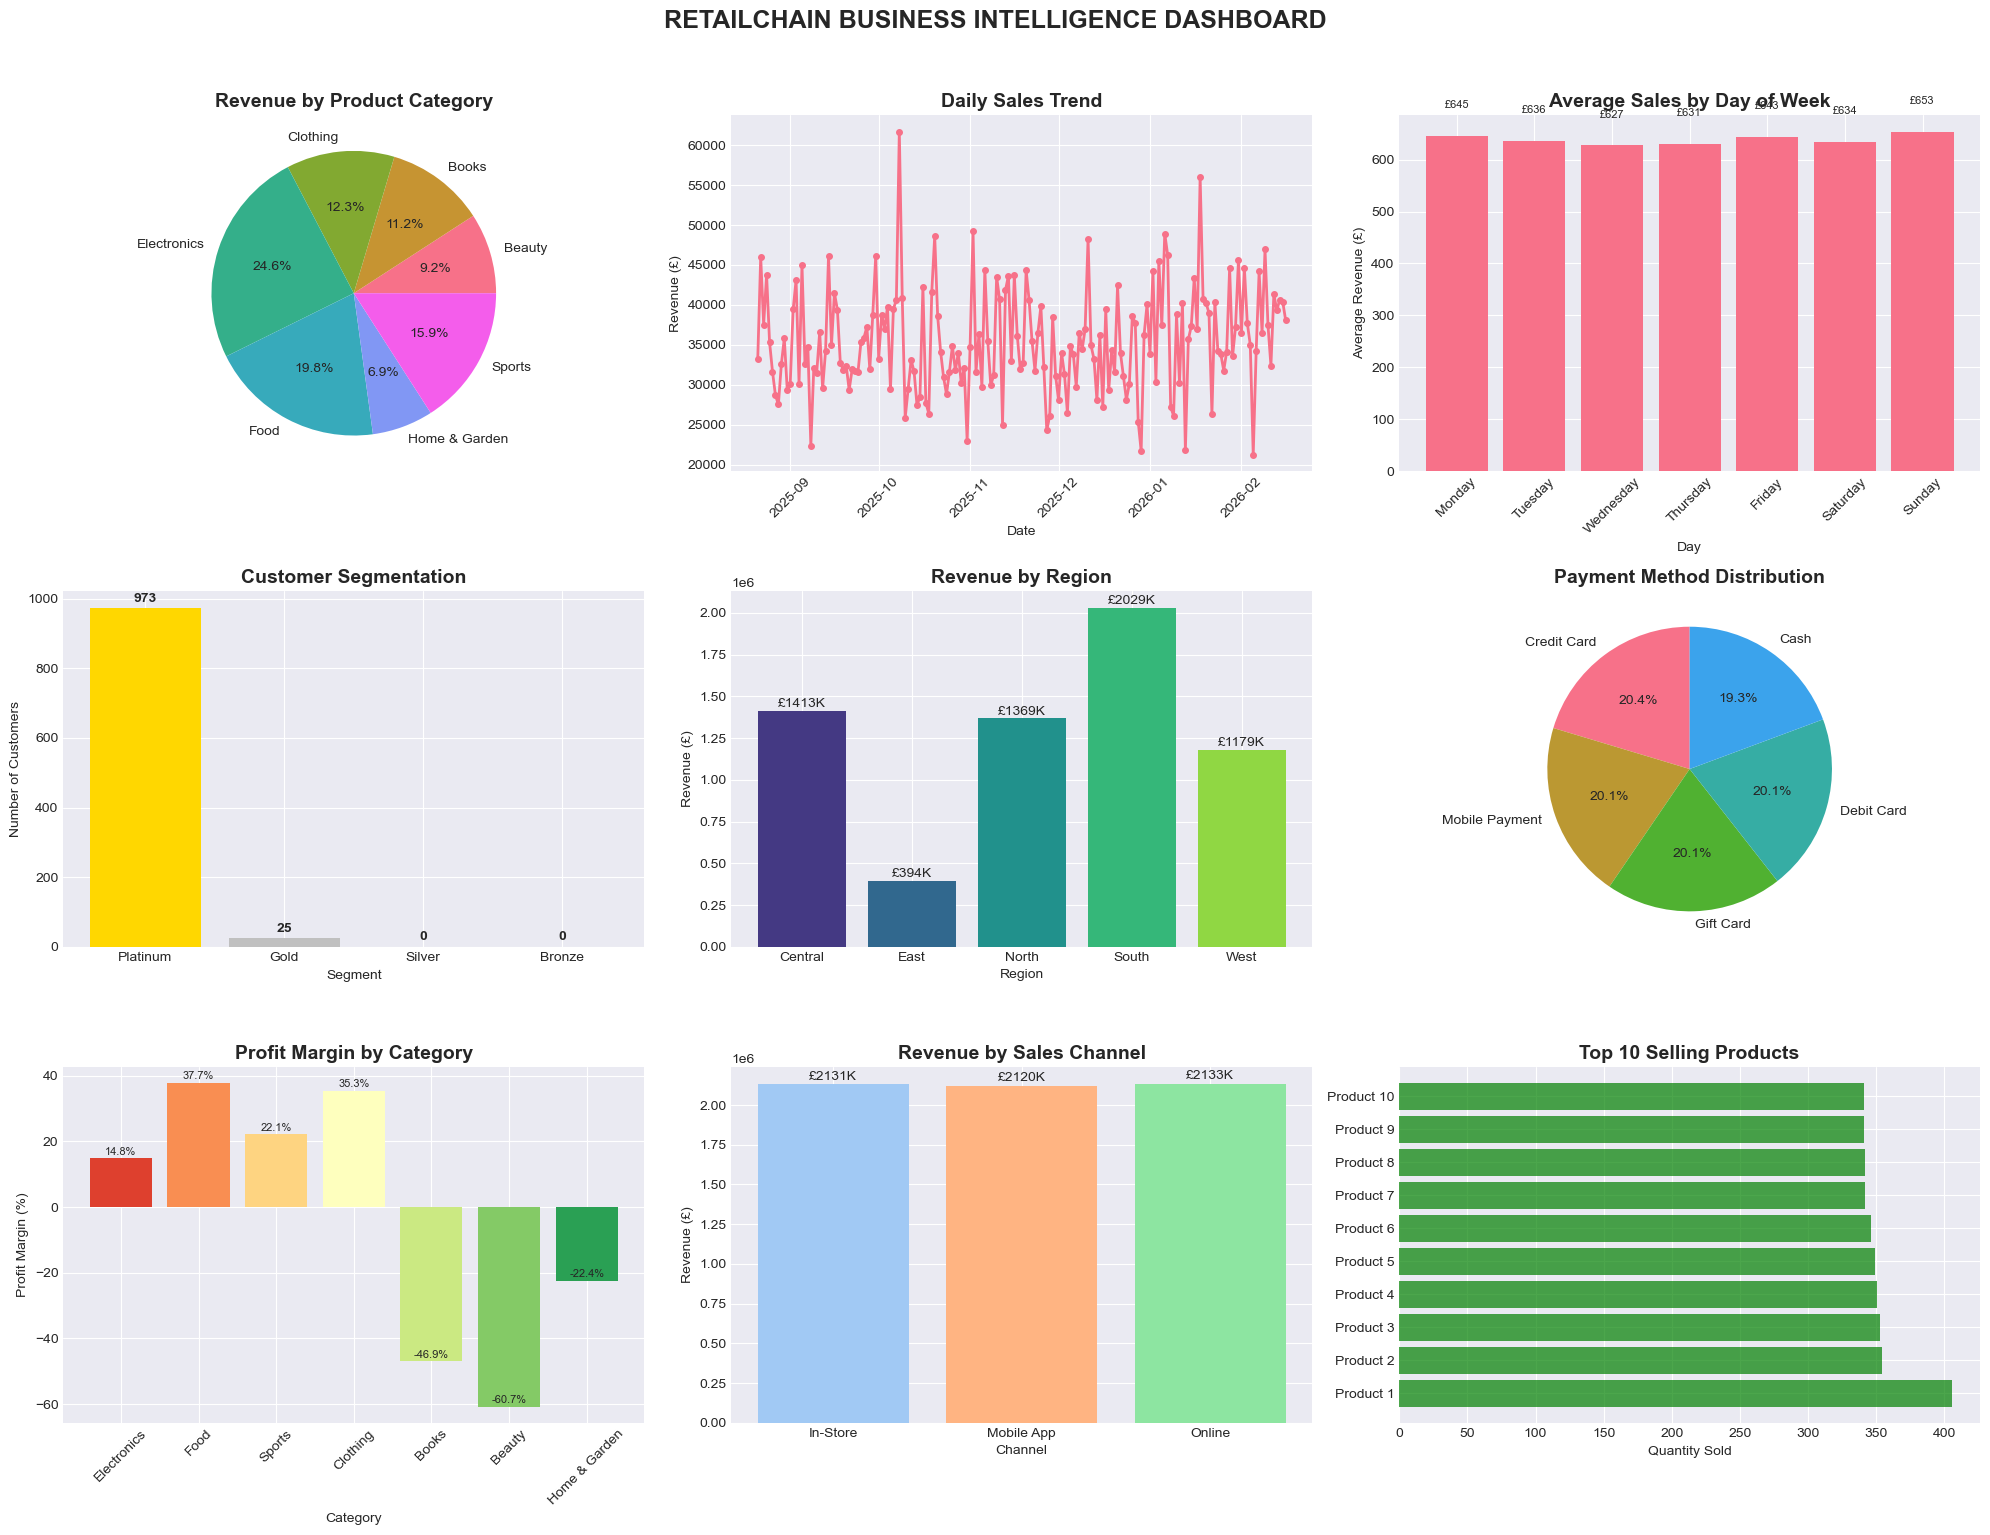


Dashboard saved as 'retailchain_dashboard.png'


In [6]:
# PART 4: VISUALIZATIONS

print("\n" + "=" * 80)
print("[7] GENERATING BUSINESS INTELLIGENCE DASHBOARD")
print("=" * 80)

# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 15))

# 1. Sales by Category (Pie Chart)
ax1 = plt.subplot(3, 3, 1)
category_revenue = transactions_df.groupby('category')['revenue'].sum()
colors = sns.color_palette('husl', len(category_revenue))
plt.pie(category_revenue.values, labels=category_revenue.index, autopct='%1.1f%%', colors=colors)
plt.title('Revenue by Product Category', fontsize=14, fontweight='bold')

# 2. Daily Sales Trend
ax2 = plt.subplot(3, 3, 2)
daily_sales_sorted = daily_sales.sort_values('Date')
plt.plot(daily_sales_sorted['Date'], daily_sales_sorted['Daily_Revenue'], marker='o', linewidth=2, markersize=4)
plt.title('Daily Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)

# 3. Sales by Day of Week
ax3 = plt.subplot(3, 3, 3)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pattern_ordered = daily_pattern.reindex(days_order)
bars = plt.bar(daily_pattern_ordered.index, daily_pattern_ordered.values)
plt.title('Average Sales by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Average Revenue (£)')
plt.xticks(rotation=45)
for bar, value in zip(bars, daily_pattern_ordered.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, f'£{value:.0f}', ha='center', va='bottom', fontsize=8)

# 4. Customer Segmentation
ax4 = plt.subplot(3, 3, 4)
segment_counts = rfm['Segment'].value_counts()
colors_segment = ['#FFD700' if x == 'Platinum' else '#C0C0C0' if x == 'Gold' else '#CD7F32' if x == 'Silver' else '#8C7853' for x in segment_counts.index]
plt.bar(segment_counts.index, segment_counts.values, color=colors_segment)
plt.title('Customer Segmentation', fontsize=14, fontweight='bold')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
for i, (idx, val) in enumerate(segment_counts.items()):
    plt.text(i, val + 10, str(val), ha='center', va='bottom', fontweight='bold')

# 5. Regional Performance
ax5 = plt.subplot(3, 3, 5)
regional_revenue = transactions_df.groupby(transactions_df.merge(stores_df, on='store_id')['region'])['revenue'].sum()
plt.bar(regional_revenue.index, regional_revenue.values, color=sns.color_palette('viridis', len(regional_revenue)))
plt.title('Revenue by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Revenue (£)')
for i, (region, revenue) in enumerate(regional_revenue.items()):
    plt.text(i, revenue + 5000, f'£{revenue/1000:.0f}K', ha='center', va='bottom')

# 6. Payment Method Distribution
ax6 = plt.subplot(3, 3, 6)
payment_counts = transactions_df['payment_method'].value_counts()
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution', fontsize=14, fontweight='bold')

# 7. Profit Margin by Category
ax7 = plt.subplot(3, 3, 7)
profit_margins = category_performance['Profit Margin %']
bars = plt.bar(profit_margins.index, profit_margins.values, color=sns.color_palette('RdYlGn', len(profit_margins)))
plt.title('Profit Margin by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
for bar, value in zip(bars, profit_margins.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=8)

# 8. Channel Performance
ax8 = plt.subplot(3, 3, 8)
channel_revenue = transactions_df.groupby('channel')['revenue'].sum()
bars = plt.bar(channel_revenue.index, channel_revenue.values, color=sns.color_palette('pastel', len(channel_revenue)))
plt.title('Revenue by Sales Channel', fontsize=14, fontweight='bold')
plt.xlabel('Channel')
plt.ylabel('Revenue (£)')
for i, (channel, revenue) in enumerate(channel_revenue.items()):
    plt.text(i, revenue + 10000, f'£{revenue/1000:.0f}K', ha='center', va='bottom')

# 9. Top Selling Products
ax9 = plt.subplot(3, 3, 9)
top_products = transactions_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
top_products_names = [f'PROD_{i+1}' for i in range(10)]
plt.barh(range(10), top_products.values, color='green', alpha=0.7)
plt.yticks(range(10), [f'Product {i+1}' for i in range(10)])
plt.title('Top 10 Selling Products', fontsize=14, fontweight='bold')
plt.xlabel('Quantity Sold')

plt.suptitle('RETAILCHAIN BUSINESS INTELLIGENCE DASHBOARD', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('retailchain_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()
print("\nDashboard saved as 'retailchain_dashboard.png'")

In [8]:
# PART 5: BUSINESS INSIGHTS

print("\n" + "=" * 80)
print("[8] BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("=" * 80)

# Calculate key metrics
total_customers = len(customers_df)
active_customers = transactions_df['customer_id'].nunique()
avg_order_value = transactions_df.groupby('transaction_id')['revenue'].sum().mean()
repeat_rate = (transactions_df.groupby('customer_id')['transaction_id'].count() > 1).mean() * 100

print(f"""
KEY PERFORMANCE INDICATORS (KPIs):
----------------------------------
Total Customers: {total_customers:,}
Active Customers (with purchases): {active_customers:,}
Customer Engagement Rate: {(active_customers/total_customers*100):.1f}%
Average Order Value: £{avg_order_value:.2f}
Customer Repeat Rate: {repeat_rate:.1f}%
""")


[8] BUSINESS INSIGHTS AND RECOMMENDATIONS

KEY PERFORMANCE INDICATORS (KPIs):
----------------------------------
Total Customers: 1,000
Active Customers (with purchases): 998
Customer Engagement Rate: 99.8%
Average Order Value: £638.41
Customer Repeat Rate: 100.0%

